# DSCI 633.01 ASSIGNMENT 5


STEP 1: IMPORTING ALL THE REQUIRED PYTHON LIBRARIES

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from keras.datasets import mnist
from keras.preprocessing import image

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

from keras.callbacks import ModelCheckpoint
import tensorflow as tf



In [176]:

!pip install Adam

seed = 42
np.random.seed(seed)

from collections import Counter
import itertools
import os

from subprocess import check_output
from tensorflow.keras.utils import to_categorical

STEP 2: LOADING AND SPLITTING DATASET

In [177]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [178]:
print('data_train shape:', X_train.shape)
print('Number of images in train  :', X_train.shape[0])

data_train shape: (60000, 28, 28)
Number of images in train  : 60000


STEP 3: PREPROCESSING DATA

In [179]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [180]:
#Train data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Test data
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [181]:
print('X_train:', X_train)
print('X_train_shape:', X_train.shape)
print('X_test.shape:',X_test.shape)
print('X_test:', X_test)

                                     

X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
X_train_shape: (60000, 784)
X_test.shape: (10000, 784)
X_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


 STEP 4: VISUALISATION OF DATA

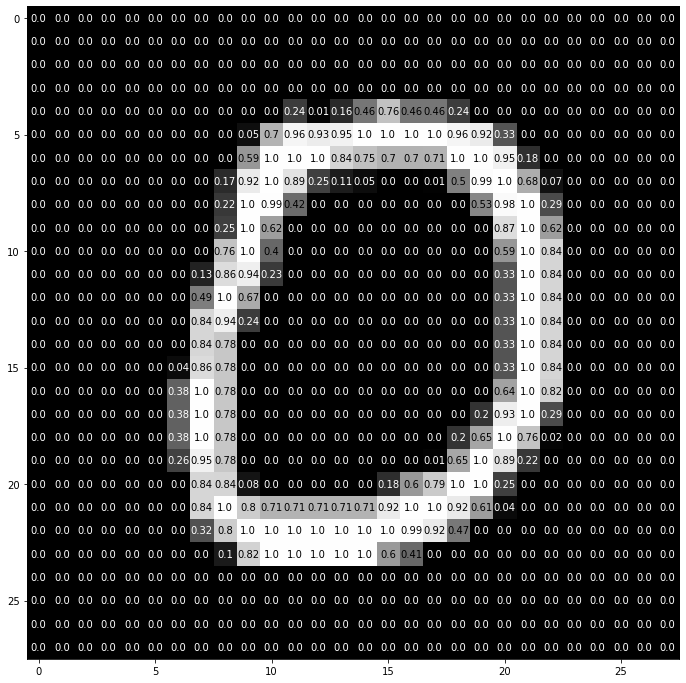

In [182]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
#
visualize_input(X_test[10].reshape(28,28), ax)

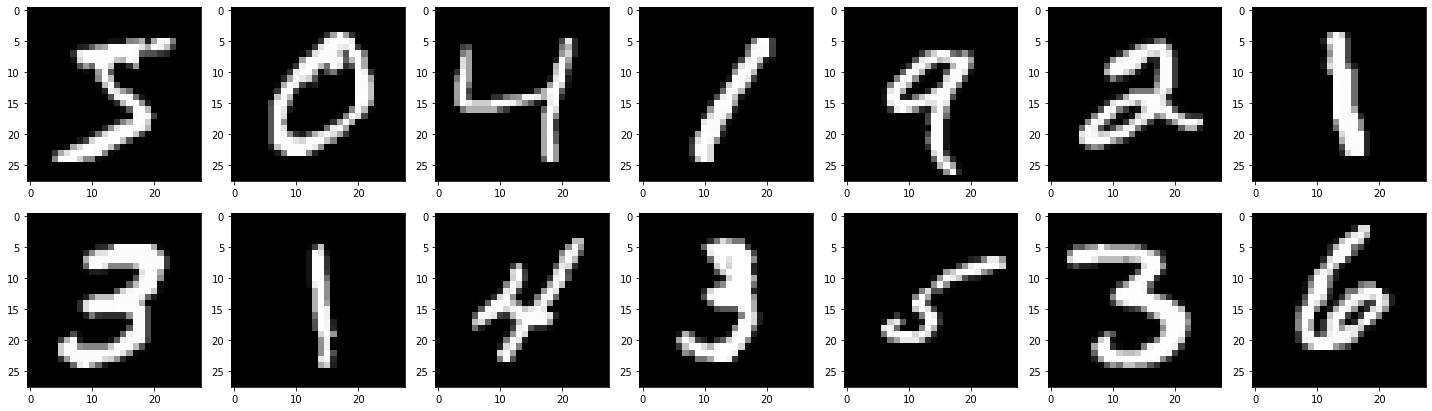

In [183]:
#Drawing Train Data
fig = plt.figure(figsize=(20,20))
for i in range(14):
    ax = fig.add_subplot(7,7,i+1)
    ax.imshow(np.reshape(X_train[i],(28,28)),cmap='gray')
    plt.tight_layout()


# ONE HOT ENCODING

In [184]:
print("The first image's actual number is:", y_train[0])

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print("The actual output number after one hot encoding is:", y_train[0])

The first image's actual number is: 5.0
The actual output number after one hot encoding is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


STEP 5: DEFINING DIFFERENT ACTIVATION FUNCTIONS

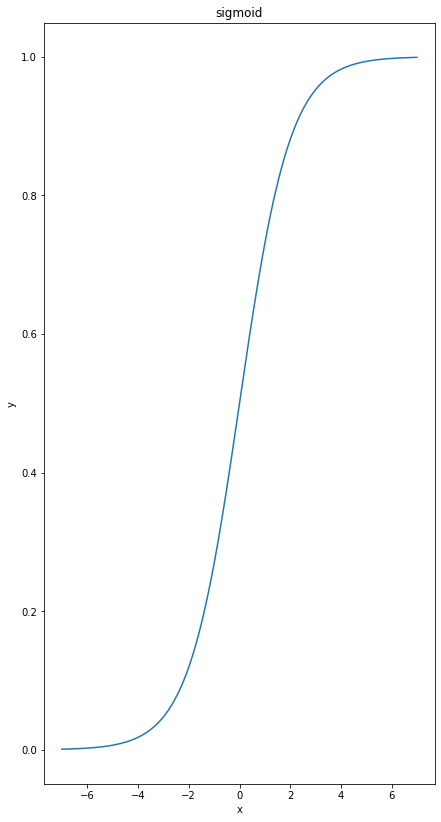

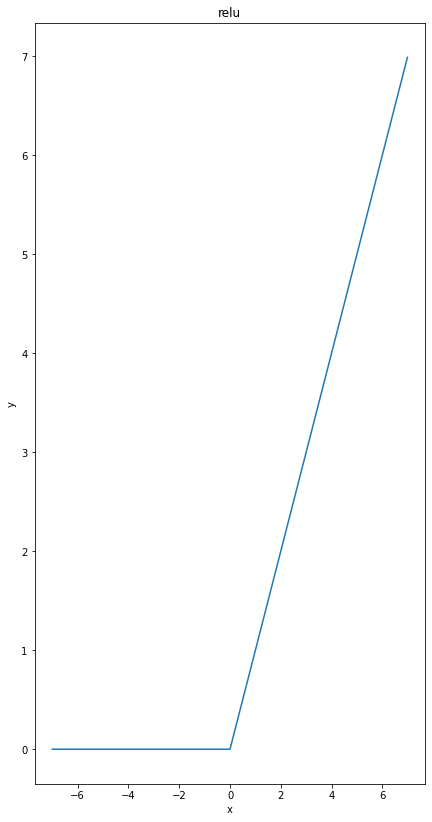

In [185]:
def sigmoid(z):
    output = 1 / (1+np.exp(-z))
    return output

def relu(z):
    return np.maximum(z, 0)

    
#plot all activation function
import matplotlib.pylab as plt
def plot_function(function, title="sigmoid"):
    x = np.arange(-7, 7, 0.01)
    y = function(x)
    
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()
    
plot_function(sigmoid, "sigmoid")    
plot_function(relu, "relu")

STEP 6: BUILDING AND DEFINING THE MULTILAYER PERCEPTRON MODEL

In [186]:

from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.callbacks import ModelCheckpoint
import os

In [187]:

y_test_label= y_test.astype('int32')
x_test_label= X_test.astype('int32')

In [188]:
def create_model(input_length, hidden_lenght1, hidden_lenght2, activation_func , 
                 dropout_val,lr_val,num_epochs, batch_size):

    # training the model and saving metrics in history
    model = Sequential()

    model.add(Dense(hidden_lenght1, input_dim=input_length, activation=activation_func))
    model.add(Dropout(dropout_val))

    model.add(Dense(hidden_lenght2, activation=activation_func))
    model.add(Dropout(dropout_val))
    model.add(Dense(10, activation='softmax'))

    lr = lr_val#.001
  

    
    model.compile(loss='categorical_crossentropy',optimizer= 'adam', metrics=['accuracy'])
    filepath = 'tmp_weights.best.hdf5'
    checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False)
    # training the model and saving metrics in history
    history_model = model.fit(X_train, y_train, callbacks=callbacks_list,
                              epochs=num_epochs, batch_size=batch_size, verbose=2,
                                validation_data = (X_test, y_test))  # verbose 2 or 0 
    return model, history_model

In [189]:
def saving_the_model(model, model_name = 'model_history.h5'):  
    model.save(model_name)
    print('Saved trained model at %s ' % model_name)

In [190]:
def draw_model(training):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(training.history['accuracy'])
    plt.plot(training.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(2,1,2)
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.tight_layout()
    plt.show()

STEP 7: EVALUATING TEST ACCURACY FOR TEST DATA

In [191]:
# evaluate test accuracy
def scoring_the_model(model_name="model_history.h5"):
    # load the model and create predictions on the test set
    mnist_model = load_model(model_name)
  
    loss_and_metrics = mnist_model.evaluate(X_test, y_test, verbose=2)
    print("Test Loss", loss_and_metrics[0])
    print("Test Accuracy", loss_and_metrics[1])

    predicted_classes = mnist_model.predict(X_test) 
    classes_x=np.argmax(predicted_classes,axis=1)
   
    correct_indices = np.nonzero(predicted_classes == y_test_label)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test_label)[0]
    print()

def draw_9_correct_9_incorrect_predictions(model_name="model_history.h5"):  
    # load the model and create predictions on the test set
    mnist_model = load_model(model_name) 
    predicted_classes = mnist_model.predict(X_test) 
    classes_x=np.argmax(predicted_classes,axis=1)
    correct_indices = np.nonzero(predicted_classes == y_test_label)[0]
    incorrect_indices = np.nonzero(predicted_classes != y_test_label)[0]
    # adapt figure size to accomodate 18 subplots
    plt.rcParams['figure.figsize'] = (7,14)

    plt.figure()
   # print("plot 9 correct predictions")
    # plot 9 correct predictions
    for i, correct in enumerate(correct_indices[:1]):
        plt.subplot(1,1,1)
        plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
        plt.title(
          "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                            y_test_label[correct]))
        plt.xticks([])
        plt.yticks([])

    #print("plot 9 incorrect predictions")
    for i, incorrect in enumerate(incorrect_indices[:9]):
        plt.subplot(1,1,1)
        plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
        plt.title(
          "Predicted {}, Truth: {}".format(predicted_classes[incorrect],
                                           y_test_label[incorrect]))
        plt.xticks([])
        plt.yticks([])



MODEL 1
ACTIVATION FUNCTION USED- RELU

In [192]:

#parameters
num_epochs = 20
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
lengh_features = 784 #lengh_features = input layer = 28 pixel  * 28 pixel == 784 node

# Create Model1 # 784-128-128-10 Dropout 0.2,Learning Rate==0.001,Activation Function =relu
# hidden layer start 128 and 2 hidden layer
# activation relu for popular and fast
model1, history_model1 = create_model(input_length=lengh_features,hidden_lenght1=128,hidden_lenght2=128, activation_func='relu',dropout_val=0.20, lr_val=0.001,num_epochs=20, batch_size=128 )
# saving the model
saving_the_model(model1,'model1_history.h5')


Epoch 1/20
469/469 - 3s - loss: 0.4017 - accuracy: 0.8785 - val_loss: 0.1708 - val_accuracy: 0.9464
Epoch 2/20
469/469 - 2s - loss: 0.1761 - accuracy: 0.9475 - val_loss: 0.1119 - val_accuracy: 0.9647
Epoch 3/20
469/469 - 2s - loss: 0.1339 - accuracy: 0.9596 - val_loss: 0.0996 - val_accuracy: 0.9687
Epoch 4/20
469/469 - 2s - loss: 0.1092 - accuracy: 0.9662 - val_loss: 0.0917 - val_accuracy: 0.9726
Epoch 5/20
469/469 - 2s - loss: 0.0916 - accuracy: 0.9712 - val_loss: 0.0807 - val_accuracy: 0.9749
Epoch 6/20
469/469 - 2s - loss: 0.0822 - accuracy: 0.9747 - val_loss: 0.0770 - val_accuracy: 0.9772
Epoch 7/20
469/469 - 2s - loss: 0.0731 - accuracy: 0.9771 - val_loss: 0.0801 - val_accuracy: 0.9773
Epoch 8/20
469/469 - 2s - loss: 0.0633 - accuracy: 0.9797 - val_loss: 0.0699 - val_accuracy: 0.9779
Epoch 9/20
469/469 - 2s - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.0654 - val_accuracy: 0.9808
Epoch 10/20
469/469 - 2s - loss: 0.0561 - accuracy: 0.9822 - val_loss: 0.0664 - val_accuracy: 0.9800

In [193]:
mc = ModelCheckpoint('model1_history.h5')
print(mc)


In [194]:
scoring_the_model('model1_history.h5')


313/313 - 0s - loss: 0.0813 - accuracy: 0.9802
Test Loss 0.08134108036756516
Test Accuracy 0.9801999926567078



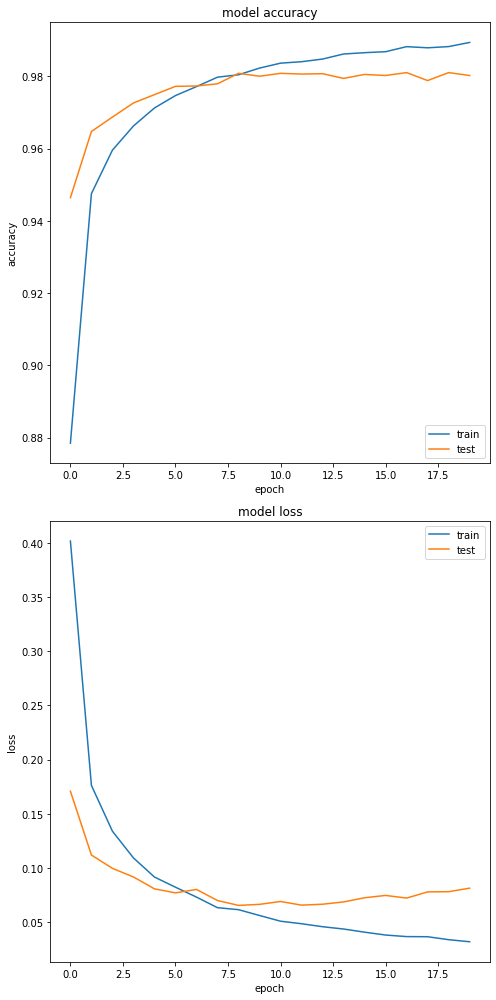

In [195]:
draw_model(history_model1) 
#PLOTTING LOSS AS A FUNCTION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


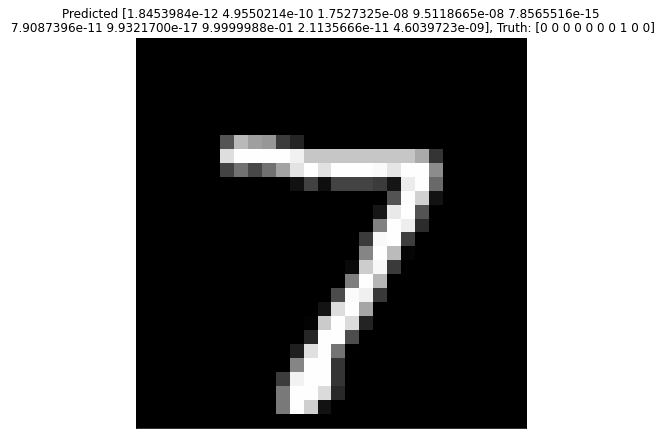

In [196]:
draw_9_correct_9_incorrect_predictions('model1_history.h5')

MODEL 2
ACTIVATION FUNCTION USED- SIGMOID
```



In [197]:

#parameters
num_epochs = 40
lengh_features = 784 #lengh_features = input layer = 28 pixel  * 28 pixel == 784 node

# Create Model1 # 784-128-128-10 Dropout 0.2,Learning Rate==0.001,Activation Function =relu
# hidden layer start 128 and 2 hidden layer
# activation relu for popular and fast
model12, history_model12 = create_model(input_length=lengh_features,hidden_lenght1=128,hidden_lenght2=128, activation_func='sigmoid',dropout_val=0.20, lr_val=0.001,num_epochs=20, batch_size=128 )
# saving the model
saving_the_model(model12,'model12_history.h5')
scoring_the_model('model12_history.h5')

Epoch 1/20
469/469 - 2s - loss: 0.8095 - accuracy: 0.7671 - val_loss: 0.3035 - val_accuracy: 0.9145
Epoch 2/20
469/469 - 2s - loss: 0.3148 - accuracy: 0.9086 - val_loss: 0.2255 - val_accuracy: 0.9316
Epoch 3/20
469/469 - 2s - loss: 0.2482 - accuracy: 0.9277 - val_loss: 0.1866 - val_accuracy: 0.9438
Epoch 4/20
469/469 - 2s - loss: 0.2088 - accuracy: 0.9385 - val_loss: 0.1622 - val_accuracy: 0.9506
Epoch 5/20
469/469 - 2s - loss: 0.1816 - accuracy: 0.9462 - val_loss: 0.1402 - val_accuracy: 0.9587
Epoch 6/20
469/469 - 2s - loss: 0.1597 - accuracy: 0.9525 - val_loss: 0.1246 - val_accuracy: 0.9626
Epoch 7/20
469/469 - 3s - loss: 0.1428 - accuracy: 0.9565 - val_loss: 0.1131 - val_accuracy: 0.9650
Epoch 8/20
469/469 - 2s - loss: 0.1312 - accuracy: 0.9599 - val_loss: 0.1058 - val_accuracy: 0.9659
Epoch 9/20
469/469 - 2s - loss: 0.1187 - accuracy: 0.9637 - val_loss: 0.1008 - val_accuracy: 0.9682
Epoch 10/20
469/469 - 2s - loss: 0.1087 - accuracy: 0.9669 - val_loss: 0.0928 - val_accuracy: 0.9723

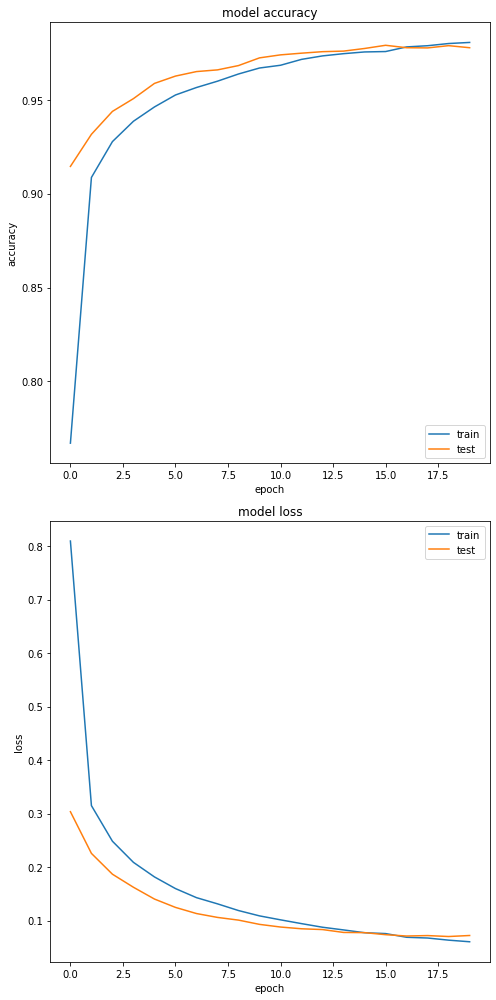

In [198]:
draw_model(history_model12) 
#PLOTTED LOSS AS FUNCTION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


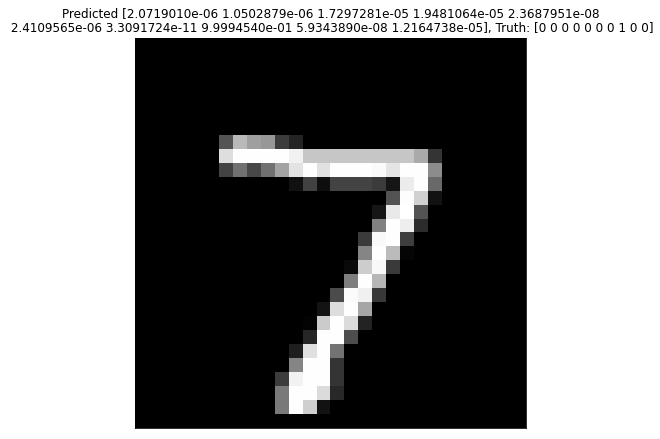

In [199]:
draw_9_correct_9_incorrect_predictions('model12_history.h5')

MODEL 3
ACTIVATION FUNCTION USED- SOFTMAX

In [200]:
model22, history_model22 = create_model(input_length=lengh_features,hidden_lenght1=256,hidden_lenght2=256,
                                    activation_func='softmax',dropout_val=0.20,
                                    lr_val=0.001,num_epochs=20, batch_size=128)

 # saving the model
saving_the_model(model22,'model22_history.h5')
#model scoring
scoring_the_model('model22_history.h5')    

Epoch 1/20
469/469 - 4s - loss: 2.2565 - accuracy: 0.2508 - val_loss: 2.1216 - val_accuracy: 0.6645
Epoch 2/20
469/469 - 3s - loss: 1.8704 - accuracy: 0.5601 - val_loss: 1.4980 - val_accuracy: 0.6776
Epoch 3/20
469/469 - 3s - loss: 1.4108 - accuracy: 0.5658 - val_loss: 1.0437 - val_accuracy: 0.6821
Epoch 4/20
469/469 - 3s - loss: 1.2129 - accuracy: 0.5654 - val_loss: 0.8627 - val_accuracy: 0.6823
Epoch 5/20
469/469 - 3s - loss: 1.1212 - accuracy: 0.5723 - val_loss: 0.7812 - val_accuracy: 0.6894
Epoch 6/20
469/469 - 3s - loss: 1.0821 - accuracy: 0.5770 - val_loss: 0.7383 - val_accuracy: 0.6971
Epoch 7/20
469/469 - 3s - loss: 1.0459 - accuracy: 0.6005 - val_loss: 0.7089 - val_accuracy: 0.7368
Epoch 8/20
469/469 - 4s - loss: 1.0006 - accuracy: 0.6293 - val_loss: 0.6683 - val_accuracy: 0.7620
Epoch 9/20
469/469 - 3s - loss: 0.9480 - accuracy: 0.6522 - val_loss: 0.6191 - val_accuracy: 0.7693
Epoch 10/20
469/469 - 3s - loss: 0.9029 - accuracy: 0.6751 - val_loss: 0.5775 - val_accuracy: 0.8156

In [201]:

#parameters
num_epochs = 30
lengh_features = 784 #lengh_features = input layer = 28 pixel  * 28 pixel == 784 node

# Create Model1 # 784-128-128-10 Dropout 0.2,Learning Rate==0.001,Activation Function = softmax
# hidden layer start 128 and 2 hidden layer
# activation relu for popular and fast
model24, history_model24 = create_model(input_length=lengh_features,hidden_lenght1=128,hidden_lenght2=128, activation_func='softmax',dropout_val=0.20, lr_val=0.001,num_epochs=50, batch_size=128 )
# saving the model
saving_the_model(model24,'model24_history.h5')
scoring_the_model('model24_history.h5')

Epoch 1/50
469/469 - 3s - loss: 2.2433 - accuracy: 0.3378 - val_loss: 2.0965 - val_accuracy: 0.7429
Epoch 2/50
469/469 - 2s - loss: 1.8351 - accuracy: 0.6297 - val_loss: 1.4421 - val_accuracy: 0.7665
Epoch 3/50
469/469 - 2s - loss: 1.3478 - accuracy: 0.6355 - val_loss: 0.9505 - val_accuracy: 0.7678
Epoch 4/50
469/469 - 2s - loss: 1.1333 - accuracy: 0.6383 - val_loss: 0.7544 - val_accuracy: 0.7749
Epoch 5/50
469/469 - 2s - loss: 1.0413 - accuracy: 0.6428 - val_loss: 0.6593 - val_accuracy: 0.7762
Epoch 6/50
469/469 - 2s - loss: 0.9874 - accuracy: 0.6487 - val_loss: 0.6021 - val_accuracy: 0.7782
Epoch 7/50
469/469 - 2s - loss: 0.9452 - accuracy: 0.6590 - val_loss: 0.5661 - val_accuracy: 0.7906
Epoch 8/50
469/469 - 2s - loss: 0.9115 - accuracy: 0.6666 - val_loss: 0.5408 - val_accuracy: 0.8024
Epoch 9/50
469/469 - 2s - loss: 0.8703 - accuracy: 0.6915 - val_loss: 0.5185 - val_accuracy: 0.8335
Epoch 10/50
469/469 - 2s - loss: 0.8287 - accuracy: 0.7185 - val_loss: 0.4859 - val_accuracy: 0.8547

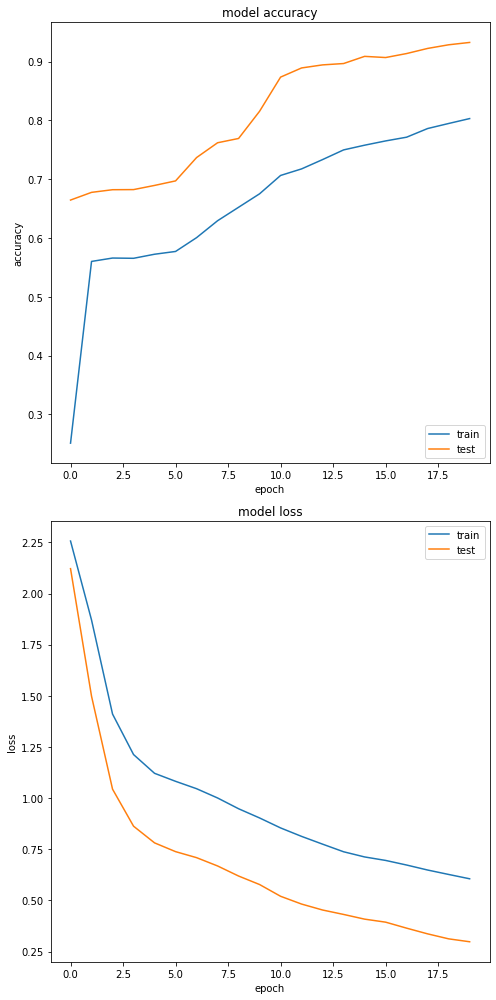

In [202]:
draw_model(history_model22) 
#PLOTTED LOSS AS FUNCTION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


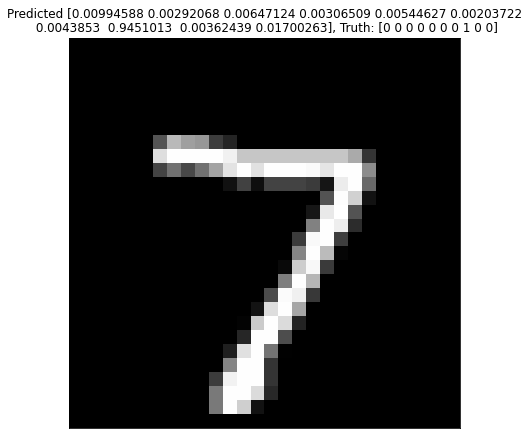

In [203]:
draw_9_correct_9_incorrect_predictions('model22_history.h5')